In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

symbol = '^N225'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-17 00:00:00+09:00,27167.730469,27371.380859,26869.380859,26890.580078,240300000,0.0,0.0
2022-10-24 00:00:00+09:00,27233.000000,27578.050781,26974.900391,27105.199219,392300000,0.0,0.0
2022-10-31 00:00:00+09:00,27404.300781,27692.550781,27032.019531,27199.740234,341400000,0.0,0.0
2022-11-07 00:00:00+09:00,27406.779297,28329.539062,27357.529297,28263.570312,423200000,0.0,0.0
2022-11-14 00:00:00+09:00,28277.640625,28305.039062,27743.150391,27899.769531,353200000,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-16 00:00:00+09:00,36601.929688,37974.718750,35828.539062,37723.910156,503900000,0.0,0.0
2024-09-23 00:00:00+09:00,38171.359375,39829.558594,37868.839844,39829.558594,524600000,0.0,0.0
2024-09-30 00:00:00+09:00,39117.828125,39126.359375,37651.070312,38635.621094,710200000,0.0,0.0


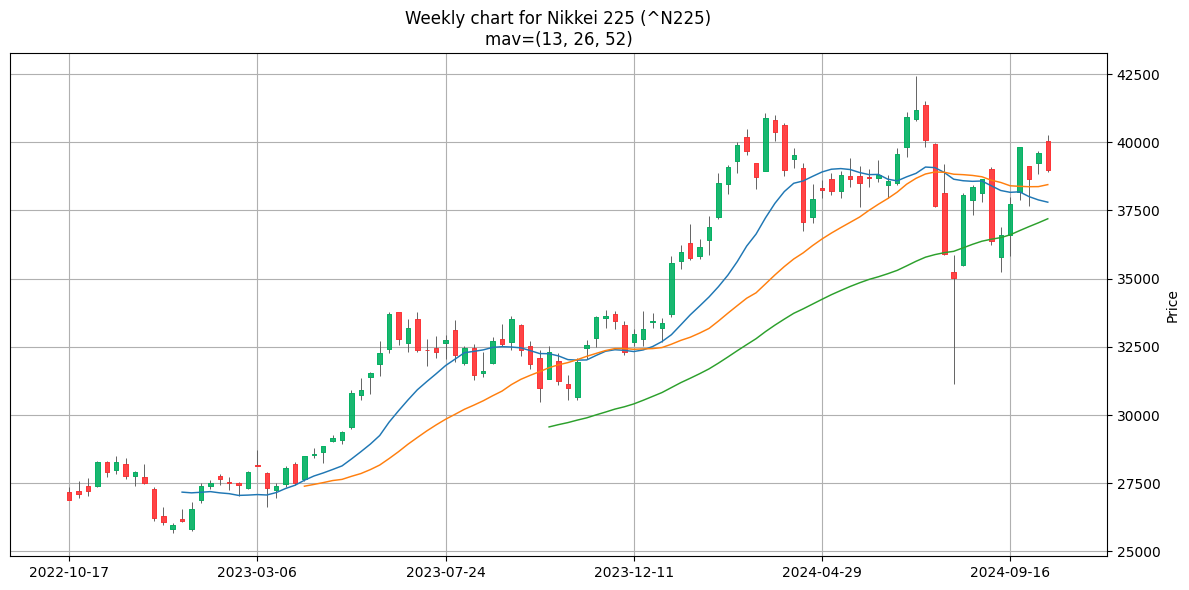

In [2]:
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

mpf.plot(
    df, type='candle', style='yahoo',
    mav=(13, 26, 52),
    volume=False,
    datetime_format='%Y-%m-%d',
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s (%s)\nmav=(13, 26, 52)' %(ticker.info['longName'], symbol))
ax.grid()

plt.tight_layout()
plt.savefig('weekly_chart_n225.png')
plt.show()

In [3]:
df.tail(2)['Close']

Date
2024-10-07 00:00:00+09:00    39605.800781
2024-10-14 00:00:00+09:00    38981.750000
Name: Close, dtype: float64

In [4]:
df.tail(2)['Close'].diff()

Date
2024-10-07 00:00:00+09:00           NaN
2024-10-14 00:00:00+09:00   -624.050781
Name: Close, dtype: float64

In [5]:
df['Close'].rolling(26).mean()

Date
2022-10-17 00:00:00+09:00             NaN
2022-10-24 00:00:00+09:00             NaN
2022-10-31 00:00:00+09:00             NaN
2022-11-07 00:00:00+09:00             NaN
2022-11-14 00:00:00+09:00             NaN
                                 ...     
2024-09-16 00:00:00+09:00    38403.598708
2024-09-23 00:00:00+09:00    38382.833984
2024-09-30 00:00:00+09:00    38369.124099
2024-10-07 00:00:00+09:00    38372.287560
2024-10-14 00:00:00+09:00    38445.879808
Name: Close, Length: 105, dtype: float64

In [6]:
df['Close'].rolling(52).mean()

Date
2022-10-17 00:00:00+09:00             NaN
2022-10-24 00:00:00+09:00             NaN
2022-10-31 00:00:00+09:00             NaN
2022-11-07 00:00:00+09:00             NaN
2022-11-14 00:00:00+09:00             NaN
                                 ...     
2024-09-16 00:00:00+09:00    36605.592924
2024-09-23 00:00:00+09:00    36758.899452
2024-09-30 00:00:00+09:00    36905.840820
2024-10-07 00:00:00+09:00    37046.029485
2024-10-14 00:00:00+09:00    37194.536997
Name: Close, Length: 105, dtype: float64